In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.chdir('/home/kookna/Downloads/newyorktaxi')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [5]:
train.shape

(1458644, 11)

In [6]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [7]:
test.shape

(625134, 9)

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
id                    625134 non-null object
vendor_id             625134 non-null int64
pickup_datetime       625134 non-null object
passenger_count       625134 non-null int64
pickup_longitude      625134 non-null float64
pickup_latitude       625134 non-null float64
dropoff_longitude     625134 non-null float64
dropoff_latitude      625134 non-null float64
store_and_fwd_flag    625134 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


In [9]:
train.drop('dropoff_datetime', axis=1, inplace=True)

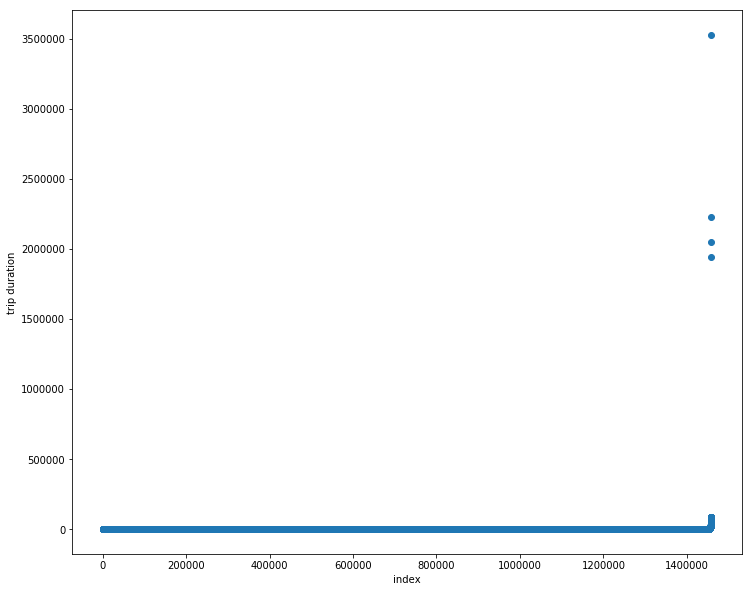

Time =>  16.399754285812378


In [10]:
import time
start = time.time()
plt.figure(figsize=(12,10))
plt.scatter(range(train.shape[0]), np.sort(train['trip_duration']))
plt.xlabel('index')
plt.ylabel('trip duration')
plt.show()

end = time.time()
print("Time => ",end-start)

In [11]:
train[train['trip_duration'] > 1500000]

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
355003,id1864733,1,2016-01-05 00:19:42,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736
680594,id0369307,1,2016-02-13 22:38:00,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578
924150,id1325766,1,2016-01-05 06:14:15,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612
978383,id0053347,1,2016-02-13 22:46:52,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282


In [12]:
q = train['trip_duration'].quantile(.99)
q

3440.0

In [13]:
train['trip_duration'].mean()

959.4922729603659

In [14]:
train = train[train['trip_duration'] < q]  # Removing outliers

In [15]:
train.shape

(1444051, 10)

In [16]:
train['trip_duration'].max()

3439

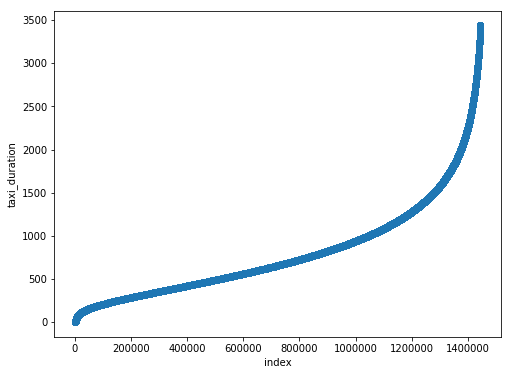

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train['trip_duration']))
plt.xlabel('index')
plt.ylabel('taxi_duration')
plt.show()

In [18]:
train["trip_duration"] = np.log(train["trip_duration"])

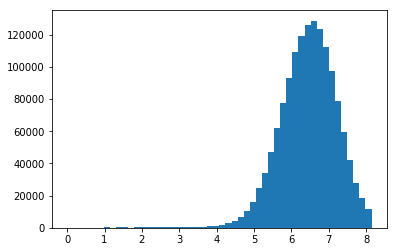

In [19]:
plt.hist(train["trip_duration"], bins=50)
plt.show()

In [20]:
print(train.shape, test.shape)

(1444051, 10) (625134, 9)


In [21]:
data = pd.concat([train,test],axis=0)

In [22]:
data.head()

,dropoff_latitude,dropoff_longitude,id,passenger_count,pickup_datetime,pickup_latitude,pickup_longitude,store_and_fwd_flag,trip_duration,vendor_id
0,40.765602,-73.964630,id2875421,1,2016-03-14 17:24:55,40.767937,-73.982155,N,6.120297,2
1,40.731152,-73.999481,id2377394,1,2016-06-12 00:43:35,40.738564,-73.980415,N,6.496775,1
2,40.710087,-74.005333,id3858529,1,2016-01-19 11:35:24,40.763939,-73.979027,N,7.661056,2
3,40.706718,-74.012268,id3504673,1,2016-04-06 19:32:31,40.719971,-74.010040,N,6.061457,2
4,40.782520,-73.972923,id2181028,1,2016-03-26 13:30:55,40.793209,-73.973053,N,6.075346,2


In [23]:
data.loc[:,'pickup_datetime'] = data.loc[:,'pickup_datetime'].apply(pd.Timestamp)

In [24]:
data.loc[:,'month'] = data.loc[:,'pickup_datetime'].dt.month
data.loc[:,'week_of_theyear'] = data.loc[:,'pickup_datetime'].dt.weekofyear
data.loc[:,'week_day'] = data.loc[:,'pickup_datetime'].dt.weekday
data.loc[:,'hour'] = data.loc[:,'pickup_datetime'].dt.hour
data.loc[:,'minute'] = data.loc[:,'pickup_datetime'].dt.minute
data.loc[:,'second'] = data.loc[:,'pickup_datetime'].dt.second

In [25]:
df_counts=data.set_index('pickup_datetime')[['id']].sort_index()

In [26]:
df_counts['count_60min'] = df_counts.isnull().rolling('60min').count()['id']

In [27]:
df_counts.head()

,id,count_60min
pickup_datetime,,
2016-01-01 00:00:17,id0190469,1.0
2016-01-01 00:00:22,id0621643,2.0
2016-01-01 00:00:28,id1384355,3.0
2016-01-01 00:00:53,id1665586,4.0
2016-01-01 00:01:01,id1210365,5.0


In [28]:
data = data.merge(df_counts, on='id', how='left')

In [29]:
data.shape

(2069185, 17)

In [30]:
# Distance functions
def haversine(lat1, lng1, lat2, lng2, radius=6371):
    
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    delta1 = (lat2 - lat1)
    delta2 = np.radians(lng2 - lng1)
    
    a = np.sin(delta1 / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(delta2 / 2)**2
    
    c = 2 * np.arcsin(a**0.5)
    
    return radius * c

def manhattan(lat1, lng1, lat2, lng2, radius=6371):
    
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    delta1 = (lat2 - lat1)
    delta2 = np.radians(lng2 - lng1)
    
    a1 = np.sin(delta1 / 2)**2 
    c1 = 2 * np.arcsin(a1**0.5)
    
    latitudeDistance = radius * c1
    
    a2 = np.sin(delta2 / 2)**2 
    c2 = 2 * np.arcsin(a2**0.5)
    
    longitudeDistance = radius * c2
    
    return latitudeDistance + longitudeDistance

def bearing(lat1, lng1, lat2, lng2, radius=6371):
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    lng_delta = np.radians(lng2 - lng1)
    
    x1 = np.sin(lng_delta) * np.cos(lat2)
    
    x2 = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta)
    
    bearing = np.arctan2(x1, x2)
    bearing = np.degrees(bearing)
    bearing = (bearing + 360) % 360
    return bearing

In [31]:
data['haversine'] = haversine(data['pickup_latitude'], data['pickup_longitude'], 
                               data['dropoff_latitude'], data['dropoff_longitude'])
data['manhattan'] = manhattan(data['pickup_latitude'], data['pickup_longitude'], 
                               data['dropoff_latitude'], data['dropoff_longitude'])
data['bearing'] = bearing(data['pickup_latitude'], data['pickup_longitude'], 
                               data['dropoff_latitude'], data['dropoff_longitude'])

In [32]:
data.head()

,dropoff_latitude,dropoff_longitude,id,passenger_count,pickup_datetime,pickup_latitude,pickup_longitude,store_and_fwd_flag,trip_duration,vendor_id,month,week_of_theyear,week_day,hour,minute,second,count_60min,haversine,manhattan,bearing
0,40.765602,-73.964630,id2875421,1,2016-03-14 17:24:55,40.767937,-73.982155,N,6.120297,2,3,11,0,17,24,55,567.0,1.498521,2.208255,99.970196
1,40.731152,-73.999481,id2377394,1,2016-06-12 00:43:35,40.738564,-73.980415,N,6.496775,1,6,23,6,0,43,35,650.0,1.805507,2.944199,242.846232
2,40.710087,-74.005333,id3858529,1,2016-01-19 11:35:24,40.763939,-73.979027,N,7.661056,2,1,3,1,11,35,24,546.0,6.385098,8.913189,200.319835
3,40.706718,-74.012268,id3504673,1,2016-04-06 19:32:31,40.719971,-74.010040,N,6.061457,2,4,14,2,19,32,31,776.0,1.485498,1.721302,187.262300
4,40.782520,-73.972923,id2181028,1,2016-03-26 13:30:55,40.793209,-73.973053,N,6.075346,2,3,12,5,13,30,55,609.0,1.188588,1.202960,179.473585


In [33]:
data[['pickup_latitude','pickup_longitude']].head()

,pickup_latitude,pickup_longitude
0,40.767937,-73.982155
1,40.738564,-73.980415
2,40.763939,-73.979027
3,40.719971,-74.010040
4,40.793209,-73.973053


In [34]:
data[['dropoff_latitude', 'dropoff_longitude']].head()

,dropoff_latitude,dropoff_longitude
0,40.765602,-73.964630
1,40.731152,-73.999481
2,40.710087,-74.005333
3,40.706718,-74.012268
4,40.782520,-73.972923


In [36]:
coordinats = np.vstack((data[['pickup_latitude', 'pickup_longitude']],data[['dropoff_latitude', 'dropoff_longitude']]))
coordinats

array([[ 40.76793671, -73.98215485],
       [ 40.73856354, -73.98041534],
       [ 40.7639389 , -73.97902679],
       ..., 
       [ 40.74866486, -73.87660217],
       [ 40.89178848, -73.85426331],
       [ 40.76937866, -73.96932983]])

In [37]:
random_indicies = np.random.permutation(len(coordinats))
random_indicies.max()

4138369

In [38]:
len(coordinats)

4138370

In [39]:
# Used MiniBatchKMeans instead of Kmeans to reduce computation time
from sklearn.cluster import MiniBatchKMeans
random_indicies = np.random.permutation(len(coordinats))
kmeans = MiniBatchKMeans(n_clusters=10).fit(coordinats[random_indicies])
print(kmeans.cluster_centers_)
print(kmeans.inertia_)

[[ 40.76217726 -73.97393404]
 [ 40.7838162  -73.8602914 ]
 [ 40.7346908  -73.99170746]
 [ 40.64630348 -73.78471334]
 [ 40.80083231 -73.96102273]
 [ 40.68586144 -73.97100419]
 [ 40.77550866 -73.95192115]
 [ 40.62560696 -73.99265374]
 [ 40.75424802 -73.98929849]
 [ 40.7150298  -74.01062869]]
17497.7478795


In [40]:
data.loc[:, 'pickup_cluster'] = kmeans.predict(data[['pickup_latitude', 'pickup_longitude']])
data.loc[:, 'dropoff_cluster'] = kmeans.predict(data[['dropoff_latitude', 'dropoff_longitude']])

In [41]:
data.head()

,dropoff_latitude,dropoff_longitude,id,passenger_count,pickup_datetime,pickup_latitude,pickup_longitude,store_and_fwd_flag,trip_duration,vendor_id,...,week_day,hour,minute,second,count_60min,haversine,manhattan,bearing,pickup_cluster,dropoff_cluster
0,40.765602,-73.964630,id2875421,1,2016-03-14 17:24:55,40.767937,-73.982155,N,6.120297,2,...,0,17,24,55,567.0,1.498521,2.208255,99.970196,0,0
1,40.731152,-73.999481,id2377394,1,2016-06-12 00:43:35,40.738564,-73.980415,N,6.496775,1,...,6,0,43,35,650.0,1.805507,2.944199,242.846232,2,2
2,40.710087,-74.005333,id3858529,1,2016-01-19 11:35:24,40.763939,-73.979027,N,7.661056,2,...,1,11,35,24,546.0,6.385098,8.913189,200.319835,0,9
3,40.706718,-74.012268,id3504673,1,2016-04-06 19:32:31,40.719971,-74.010040,N,6.061457,2,...,2,19,32,31,776.0,1.485498,1.721302,187.262300,9,9
4,40.782520,-73.972923,id2181028,1,2016-03-26 13:30:55,40.793209,-73.973053,N,6.075346,2,...,5,13,30,55,609.0,1.188588,1.202960,179.473585,4,0


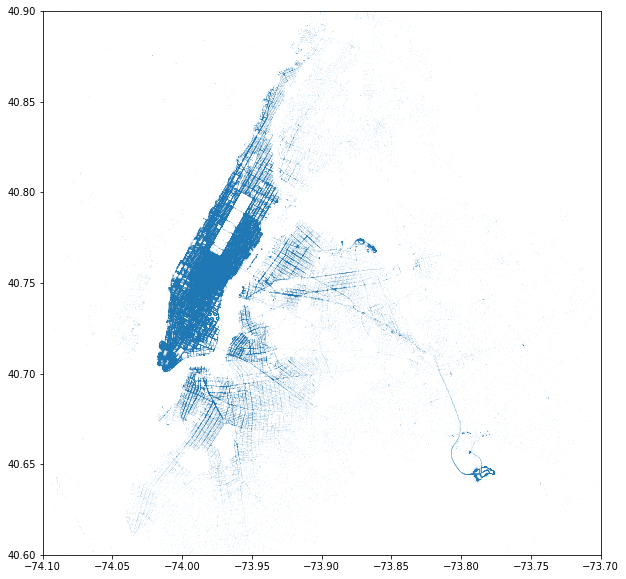

In [42]:
longitude = list(data['pickup_longitude']) + list(data['dropoff_longitude'])
latitude = list(data['pickup_latitude']) + list(data['dropoff_latitude'])

plt.figure(figsize = (10,10))
plt.plot(longitude,latitude,'.', alpha = 0.4, markersize = 0.05)
plt.xlim(-74.1,-73.7)
plt.ylim(40.6, 40.9)
plt.show()

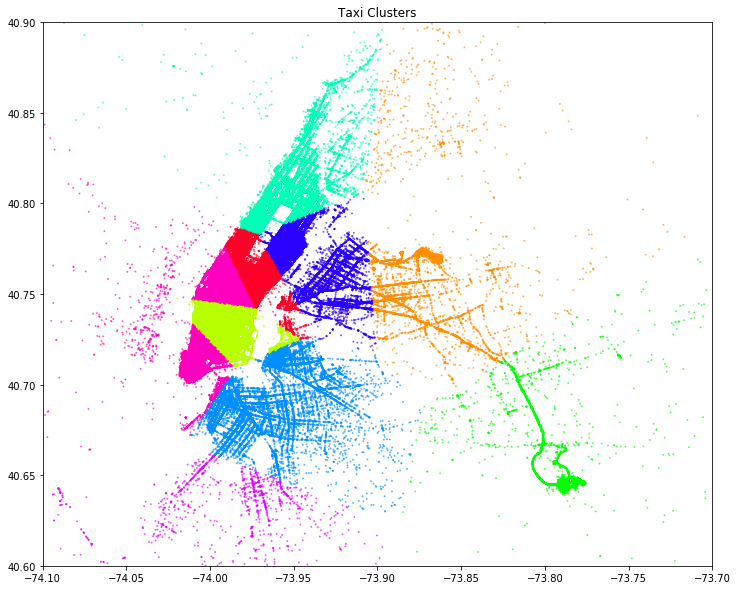

In [44]:
fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(12,10))
plt.ylim(40.6, 40.9)
plt.xlim(-74.1,-73.7)

cm = plt.get_cmap('gist_rainbow')

colors = [cm(2.*i/15) for i in range(10)]
colored = [colors[k] for k in data['pickup_cluster']]

ax.scatter(data.pickup_longitude,data.pickup_latitude,color=colored,s=1,alpha=.5)

plt.title('Taxi Clusters')
plt.show()

In [45]:
data['avg_speed'] = (data['haversine']/(np.exp(data['trip_duration']))) * 3600
data['avg_speed_manhattan'] = (data['manhattan']/(np.exp(data['trip_duration']))) * 3600

In [46]:
data.head()

,dropoff_latitude,dropoff_longitude,id,passenger_count,pickup_datetime,pickup_latitude,pickup_longitude,store_and_fwd_flag,trip_duration,vendor_id,...,minute,second,count_60min,haversine,manhattan,bearing,pickup_cluster,dropoff_cluster,avg_speed,avg_speed_manhattan
0,40.765602,-73.964630,id2875421,1,2016-03-14 17:24:55,40.767937,-73.982155,N,6.120297,2,...,24,55,567.0,1.498521,2.208255,99.970196,0,0,11.856428,17.471907
1,40.731152,-73.999481,id2377394,1,2016-06-12 00:43:35,40.738564,-73.980415,N,6.496775,1,...,43,35,650.0,1.805507,2.944199,242.846232,2,2,9.803659,15.986598
2,40.710087,-74.005333,id3858529,1,2016-01-19 11:35:24,40.763939,-73.979027,N,7.661056,2,...,35,24,546.0,6.385098,8.913189,200.319835,0,9,10.822201,15.107100
3,40.706718,-74.012268,id3504673,1,2016-04-06 19:32:31,40.719971,-74.010040,N,6.061457,2,...,32,31,776.0,1.485498,1.721302,187.262300,9,9,12.465721,14.444493
4,40.782520,-73.972923,id2181028,1,2016-03-26 13:30:55,40.793209,-73.973053,N,6.075346,2,...,30,55,609.0,1.188588,1.202960,179.473585,4,0,9.836594,9.955533


In [47]:
avg_percluster = data.pivot_table(values=["avg_speed"], index=["pickup_cluster","dropoff_cluster"], aggfunc=np.mean)
avg_percluster_manh = data.pivot_table(values=["avg_speed_manhattan"], index=["pickup_cluster","dropoff_cluster"], aggfunc=np.mean)
data['avg_percluster'] = data['avg_speed']
data['avg_percluster_manh'] = data['avg_speed']

In [48]:
for i in range(10):
    for j in range(10):
        data.loc[((data['pickup_cluster'] == i) & (data['dropoff_cluster'] == j)) , 'avg_percluster'] = avg_percluster['avg_speed'][i][j]
        data.loc[((data['pickup_cluster'] == i) & (data['dropoff_cluster'] == j)) , 'avg_percluster_manh'] = avg_percluster_manh['avg_speed_manhattan'][i][j]

In [49]:
data.head()

,dropoff_latitude,dropoff_longitude,id,passenger_count,pickup_datetime,pickup_latitude,pickup_longitude,store_and_fwd_flag,trip_duration,vendor_id,...,count_60min,haversine,manhattan,bearing,pickup_cluster,dropoff_cluster,avg_speed,avg_speed_manhattan,avg_percluster,avg_percluster_manh
0,40.765602,-73.964630,id2875421,1,2016-03-14 17:24:55,40.767937,-73.982155,N,6.120297,2,...,567.0,1.498521,2.208255,99.970196,0,0,11.856428,17.471907,10.325541,14.810579
1,40.731152,-73.999481,id2377394,1,2016-06-12 00:43:35,40.738564,-73.980415,N,6.496775,1,...,650.0,1.805507,2.944199,242.846232,2,2,9.803659,15.986598,10.891154,16.044920
2,40.710087,-74.005333,id3858529,1,2016-01-19 11:35:24,40.763939,-73.979027,N,7.661056,2,...,546.0,6.385098,8.913189,200.319835,0,9,10.822201,15.107100,18.291761,27.586090
3,40.706718,-74.012268,id3504673,1,2016-04-06 19:32:31,40.719971,-74.010040,N,6.061457,2,...,776.0,1.485498,1.721302,187.262300,9,9,12.465721,14.444493,10.609540,15.146830
4,40.782520,-73.972923,id2181028,1,2016-03-26 13:30:55,40.793209,-73.973053,N,6.075346,2,...,609.0,1.188588,1.202960,179.473585,4,0,9.836594,9.955533,15.523289,21.696825


In [50]:
train_data, test_data = data[:1444051], data[1444051:]
print(train_data.shape, test_data.shape)

(1444051, 26) (625134, 26)


In [51]:
y = train_data['trip_duration']
train_data.drop('trip_duration', axis=1, inplace=True)
train_data.drop('id', axis=1, inplace=True)
train_data.drop('pickup_datetime', axis=1, inplace=True)
train_data.drop('avg_speed', axis=1, inplace=True)
train_data.drop('avg_speed_manhattan', axis=1, inplace=True)
train_data.drop('store_and_fwd_flag', axis=1, inplace=True)


test_data.drop('store_and_fwd_flag', axis=1, inplace=True)
test_data.drop('avg_speed', axis=1, inplace=True)
test_data.drop('avg_speed_manhattan', axis=1, inplace=True)
test_data.drop('trip_duration', axis=1, inplace=True)
test_data.drop('id', axis=1, inplace=True)
test_data.drop('pickup_datetime', axis=1, inplace=True)

In [52]:
data.drop('trip_duration', axis=1, inplace=True)
data.drop('id', axis=1, inplace=True)
data.drop('pickup_datetime', axis=1, inplace=True)
data.drop('avg_speed', axis=1, inplace=True)
data.drop('avg_speed_manhattan', axis=1, inplace=True)
data.drop('store_and_fwd_flag', axis=1, inplace=True)

In [53]:
data.head()

,dropoff_latitude,dropoff_longitude,passenger_count,pickup_latitude,pickup_longitude,vendor_id,month,week_of_theyear,week_day,hour,minute,second,count_60min,haversine,manhattan,bearing,pickup_cluster,dropoff_cluster,avg_percluster,avg_percluster_manh
0,40.765602,-73.964630,1,40.767937,-73.982155,2,3,11,0,17,24,55,567.0,1.498521,2.208255,99.970196,0,0,10.325541,14.810579
1,40.731152,-73.999481,1,40.738564,-73.980415,1,6,23,6,0,43,35,650.0,1.805507,2.944199,242.846232,2,2,10.891154,16.044920
2,40.710087,-74.005333,1,40.763939,-73.979027,2,1,3,1,11,35,24,546.0,6.385098,8.913189,200.319835,0,9,18.291761,27.586090
3,40.706718,-74.012268,1,40.719971,-74.010040,2,4,14,2,19,32,31,776.0,1.485498,1.721302,187.262300,9,9,10.609540,15.146830
4,40.782520,-73.972923,1,40.793209,-73.973053,2,3,12,5,13,30,55,609.0,1.188588,1.202960,179.473585,4,0,15.523289,21.696825


In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6).fit(data)
X2_train = pca.transform(train_data)
X2_test = pca.transform(test_data)

X2_train = pd.DataFrame(X2_train)
X2_test = pd.DataFrame(X2_test)

train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

train_data = pd.concat([train_data, X2_train], ignore_index=True, axis=1)
test_data = pd.concat([test_data, X2_test], ignore_index=True, axis=1)

print(X2_train.shape + X2_test.shape)
print(train_data.shape + test_data.shape)

(1444051, 6, 625134, 6)
(1444051, 26, 625134, 26)


In [55]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,40.765602,-73.964630,1,40.767937,-73.982155,2,3,11,0,17,...,0,0,10.325541,14.810579,2.210154,-52.972361,17.049692,-19.787074,-8.256930,2.594479
1,40.731152,-73.999481,1,40.738564,-73.980415,1,6,23,6,0,...,2,2,10.891154,16.044920,-81.117422,89.407521,-9.246954,-11.270661,-5.856223,-9.420403
2,40.710087,-74.005333,1,40.763939,-73.979027,2,1,3,1,11,...,0,9,18.291761,27.586090,22.820630,47.463863,-7.297410,2.268863,8.613060,11.494133
3,40.706718,-74.012268,1,40.719971,-74.010040,2,4,14,2,19,...,9,9,10.609540,15.146830,-207.239105,33.119122,-1.530306,-2.536656,-6.828824,-1.483693
4,40.782520,-73.972923,1,40.793209,-73.973053,2,3,12,5,13,...,4,0,15.523289,21.696825,-40.098825,26.233769,11.788761,-22.629175,-1.935036,1.677759


In [56]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,40.756680,-73.990173,1,40.732029,-73.988129,1,6,26,3,23,...,2,8,12.238364,17.035084,-49.241770,203.167020,-12.306691,-39.095885,-3.681079,-13.132014
1,40.655403,-73.959808,1,40.679993,-73.964203,1,6,26,3,23,...,5,5,14.239905,21.077467,-48.187022,19.010241,-14.628579,-34.712020,-0.428802,-12.991908
2,40.729523,-73.986160,1,40.737583,-73.997437,1,6,26,3,23,...,2,2,10.891154,16.044920,-48.997957,-19.922844,-17.530939,-29.463118,-6.230184,-13.128173
3,40.730469,-73.986427,1,40.771900,-73.956070,2,6,26,3,23,...,6,2,18.422539,28.246988,-49.344358,55.731906,-20.288349,-24.134514,9.427993,-12.755908
4,40.755890,-73.961510,1,40.761475,-73.970215,1,6,26,3,23,...,0,0,10.325541,14.810579,-48.988743,-22.985341,-24.225627,-17.166913,-7.683783,-13.162182


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size=0.35)

In [59]:
import time
start = time.time()

import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor(n_estimators=3200,
                   max_depth=9,
                   learning_rate=0.02,
                   min_child_weight=10, 
                   subsample=0.8,
                   colsample_bytree=0.8,
                   reg_alpha=0.005,
                   seed=27
                  )

xgb.fit(X_train, y_train)

end = time.time()
print("Time => " , end-start)

/home/kookna/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Time =>  10178.951766252518


In [60]:
print(xgb.score(X_train,y_train))
print(xgb.score(X_test,y_test))

0.872931799326
0.80688035863


In [61]:
pred = xgb.predict(test_data)

In [62]:
df_sub = pd.DataFrame({'id': test['id'].values,'trip_duration': np.exp(pred)}).set_index('id')

In [63]:
df_sub.head()

,trip_duration
id,
id3004672,802.738708
id3505355,621.775452
id1217141,409.203125
id2150126,894.361572
id1598245,361.466431


In [64]:
df_sub.to_csv('submission_results.csv')